In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyspark
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean
import seaborn as sns

In [ ]:
spark_session = SparkSession.builder.getOrCreate()

df = spark_session.read.options(header=True).csv('bestsellers with categories.csv')

In [ ]:
df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [ ]:
new_df = df.filter(df['User rating'] > 4.7)

In [ ]:
new_df.select(mean("Price").alias("average price")).show()

+-----------------+
|    average price|
+-----------------+
|10.69832402234637|
+-----------------+



In [ ]:
pandas_frame = df.toPandas()

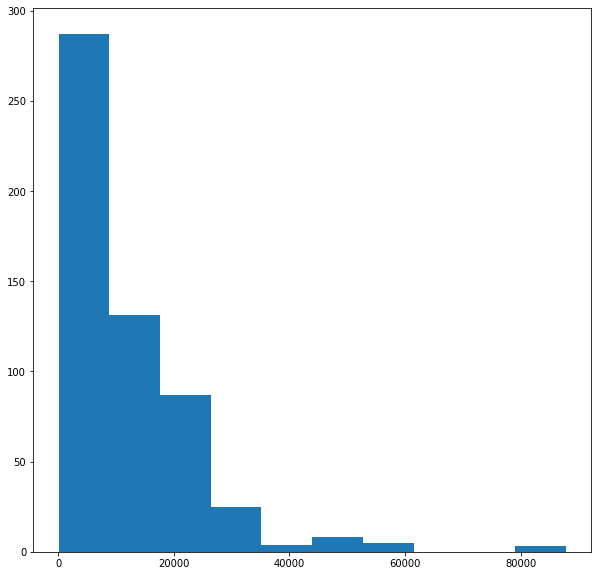

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(x=pandas_frame['Reviews'].astype(float))
plt.show()

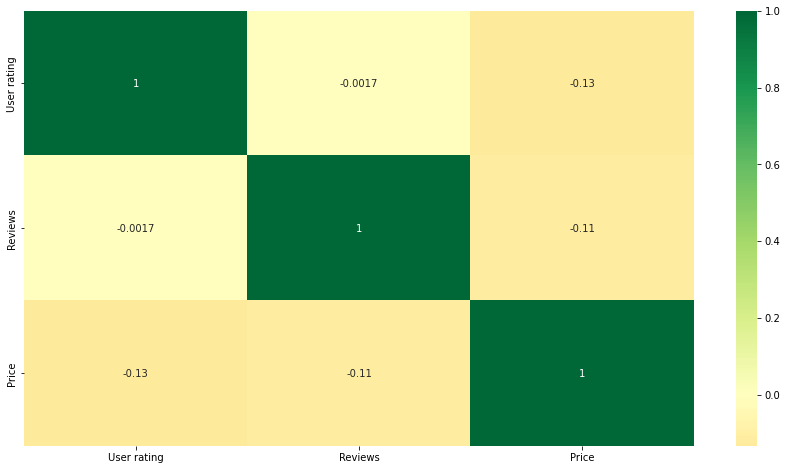

In [ ]:
plt.figure(figsize=(15, 8))
frame_for_corr = df.select(['User rating','Reviews','Price']).toPandas()
frame_for_corr = frame_for_corr[['User rating','Reviews','Price']].astype(float)
sns.heatmap(frame_for_corr.corr(), xticklabels=frame_for_corr.corr().columns, yticklabels=frame_for_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.show()

<Figure size 1080x576 with 0 Axes>

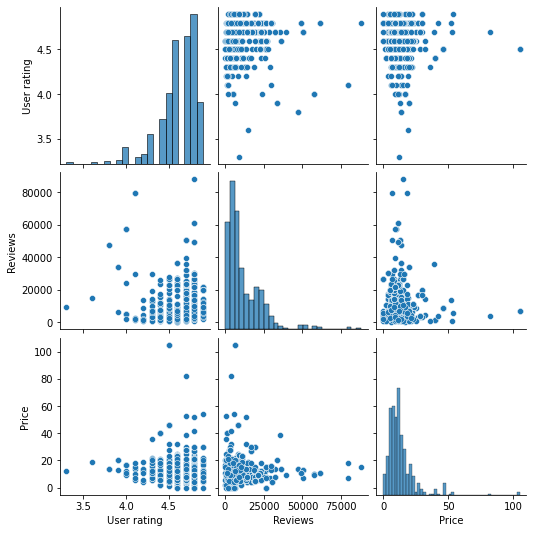

In [ ]:
plt.figure(figsize=(15, 8))
sns.pairplot(frame_for_corr)
plt.show()

In [ ]:
df.sort(df['User Rating'].desc()).show(1)

+--------------------+---------------+-----------+-------+-----+----+-------+
|                Name|         Author|User Rating|Reviews|Price|Year|  Genre|
+--------------------+---------------+-----------+-------+-----+----+-------+
|Brown Bear, Brown...|Bill Martin Jr.|        4.9|  14344|    5|2017|Fiction|
+--------------------+---------------+-----------+-------+-----+----+-------+
only showing top 1 row



In [ ]:
df.sort(df['User Rating']).show(3)

+--------------------+------------+-----------+-------+-----+----+-------+
|                Name|      Author|User Rating|Reviews|Price|Year|  Genre|
+--------------------+------------+-----------+-------+-----+----+-------+
|  The Casual Vacancy|J.K. Rowling|        3.3|   9372|   12|2012|Fiction|
|Go Set a Watchman...|  Harper Lee|        3.6|  14982|   19|2015|Fiction|
|Fifty Shades of G...|   E L James|        3.8|  47265|   14|2012|Fiction|
+--------------------+------------+-----------+-------+-----+----+-------+
only showing top 3 rows



In [ ]:
df = df.withColumn('Reviews',df['Reviews'].cast('float'))

In [ ]:
df.select(['Author', 'Reviews']).groupBy('Author').sum('Reviews').show(1)

+-----------+------------+
|     Author|sum(Reviews)|
+-----------+------------+
|Sarah Young|    117456.0|
+-----------+------------+
only showing top 1 row



In [ ]:
book_count = df.select('Author').groupBy('Author').count()

In [ ]:
book_count.select(['Author', 'count']).sort(book_count['count'].desc()).show(1)

+-----------+-----+
|     Author|count|
+-----------+-----+
|Jeff Kinney|   12|
+-----------+-----+
only showing top 1 row



In [ ]:
df.select(['Name', 'User Rating', 'Genre']).filter(df['Genre'] == 'Fiction').sort(df['User Rating']).show(1)

+------------------+-----------+-------+
|              Name|User Rating|  Genre|
+------------------+-----------+-------+
|The Casual Vacancy|        3.3|Fiction|
+------------------+-----------+-------+
only showing top 1 row



In [ ]:
df.select(['Name', 'User Rating', 'Genre']).filter(df['Genre'] == 'Non Fiction').sort(df['User Rating'].desc()).show(1)

+--------------------+-----------+-----------+
|                Name|User Rating|      Genre|
+--------------------+-----------+-----------+
|Hamilton: The Rev...|        4.9|Non Fiction|
+--------------------+-----------+-----------+
only showing top 1 row



In [ ]:
avg_reviews_by_year = df.groupBy("Year").agg({"Reviews": "avg"}).sort(df['Year']).toPandas()

In [ ]:
avg_reviews_by_year

,Year,avg(Reviews)
0,2009,4710.12
1,2010,5479.62
2,2011,8100.82
3,2012,13090.92
4,2013,13098.14
5,2014,15859.94
6,2015,14233.38
7,2016,14196.00
8,2017,12888.40
9,2018,13930.42


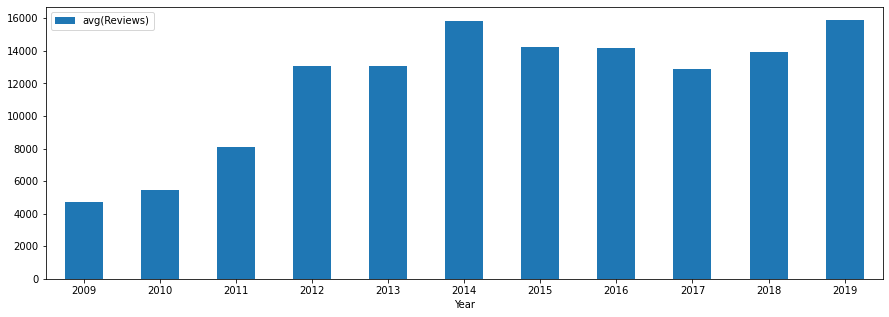

In [ ]:
avg_reviews_by_year.plot.bar(y='avg(Reviews)', x='Year', figsize=(15, 5))
plt.xticks(rotation=360)
plt.show()

In [ ]:
count_by_genre = df.groupBy("Genre").agg({"Genre": "count"}).sort(df['Genre']).toPandas()

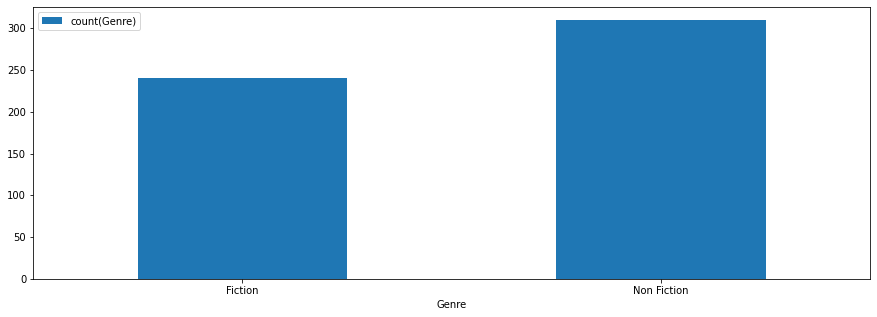

In [ ]:
count_by_genre.plot.bar(y='count(Genre)', x='Genre', figsize=(15, 5))
plt.xticks(rotation=360)
plt.show()